## HW Day 12 - Ripeness of Avacado

**Imports**

In [1]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amldvvs/avocado-ripeness-classification-dataset")

print("Path to dataset files:", path)

file = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file)
df

Path to dataset files: /Users/mac/.cache/kagglehub/datasets/amldvvs/avocado-ripeness-classification-dataset/versions/1


,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking
...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard
246,21.6,17,36,19,black,47,182,240,firm-ripe
247,14.0,4,40,17,black,37,188,274,ripe
248,61.5,63,87,75,green,65,261,162,pre-conditioned


### Pairplot Analysis

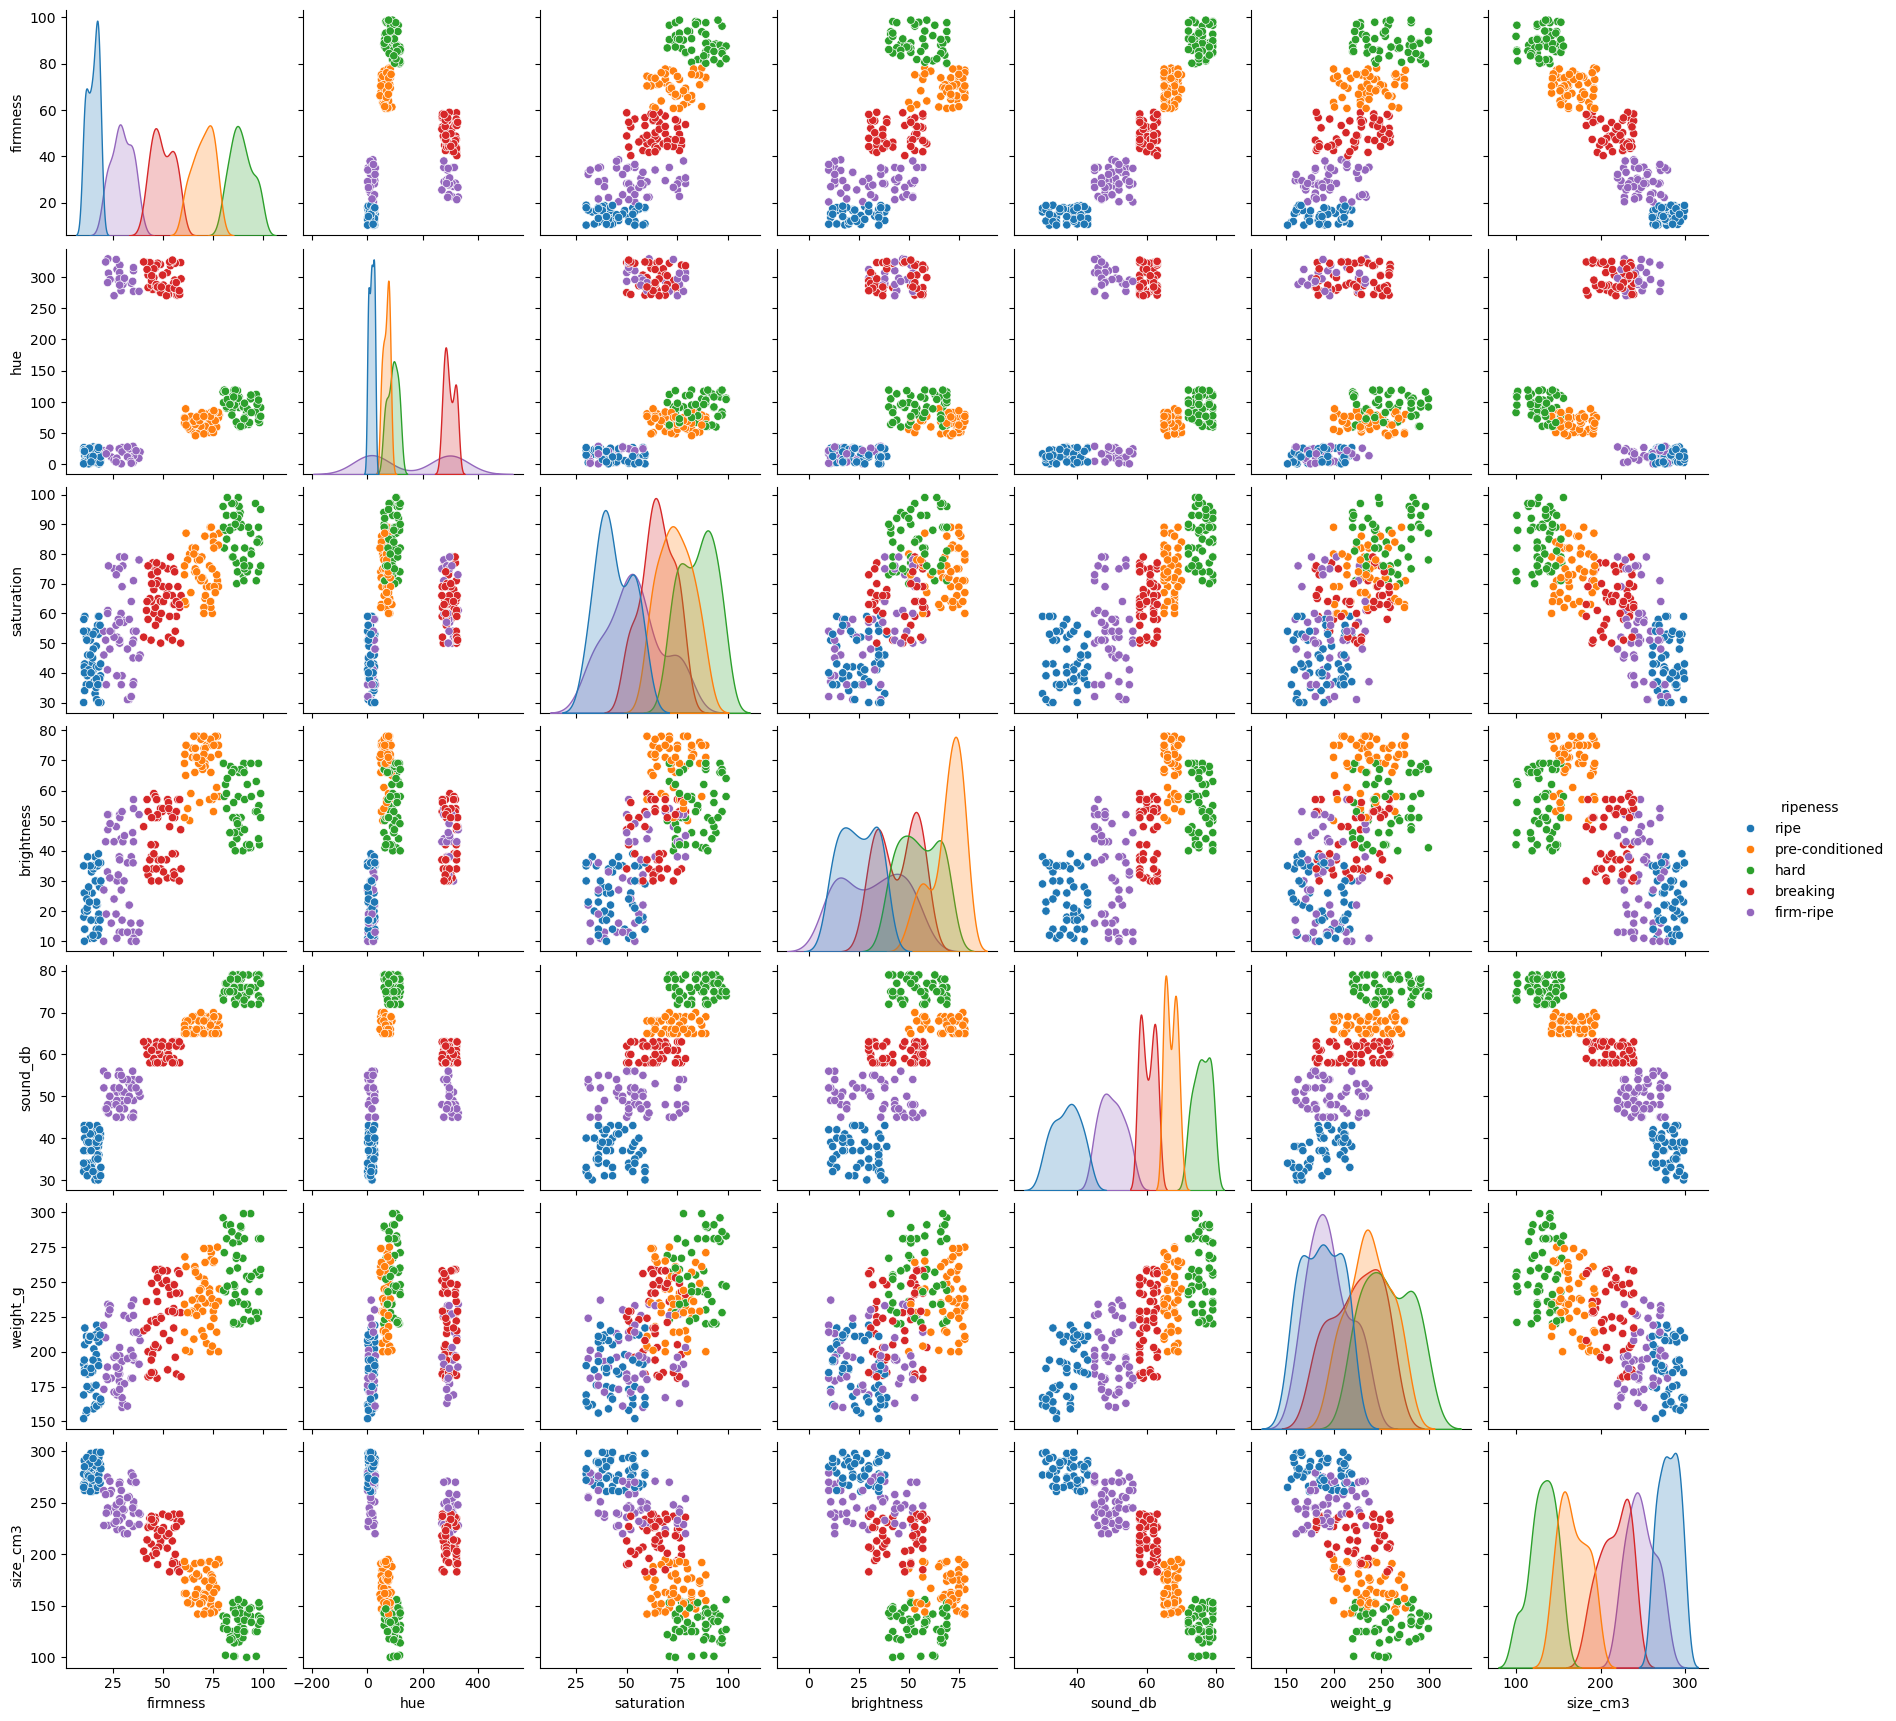

In [3]:
sns.pairplot(df, hue = 'ripeness')

**Observations** 
The pairplot shows seperation by ripness. The firmbess decreases as the ripeness increases, and hue/ brightness drops when the avacados darken. Weight and sound show more overlap, which means they are probably less useful for prediction. 

### Train/Test of the Model

In [4]:
df.keys()

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness'],
      dtype='object')

In [5]:
cols = ['firmness', 'hue', 'saturation', 'brightness',
       'sound_db', 'weight_g', 'size_cm3']
X = df[cols].copy()
y = df['ripeness'].copy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 67)

In [7]:
knn = KNeighborsClassifier(n_neighbors= 3)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
yt = y_test.iloc[0]
yt

'firm-ripe'

In [10]:
xt = X_test.iloc[:2]
xt

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
246,21.6,17,36,19,47,182,240
149,16.8,3,31,23,31,161,298


### Accuracy vs Number of Neighbors

In [11]:
knn.predict(xt)

array(['firm-ripe', 'ripe'], dtype=object)

In [12]:
knn.score(X_test, y_test)

0.94

In [13]:
y_pred = knn.predict(X_test)

In [14]:
mask = y_pred != y_test
X_test[mask].index

Index([215, 175, 231], dtype='int64')

In [15]:
y_test[mask]

215    firm-ripe
175    firm-ripe
231    firm-ripe
Name: ripeness, dtype: object

In [16]:
neighbors = [1,2,3,4,5,6,7,8,9]
acc_score = []
for n in neighbors:
    knn = knn = KNeighborsClassifier(n_neighbors= n)
    knn.fit(X_train, y_train)
    acc_score.append(knn.score(X_test, y_test))

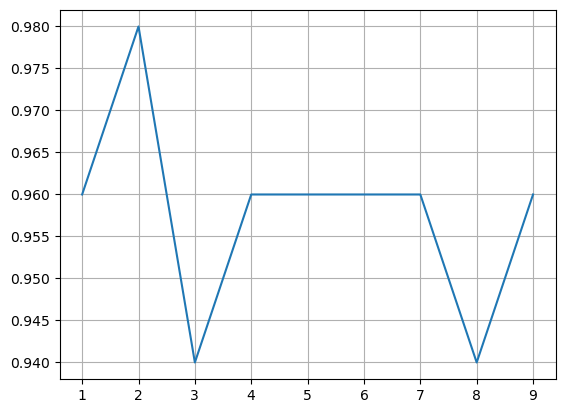

In [17]:
plt.plot(neighbors, acc_score)
plt.grid()
plt.show()

**Observations**
The highest accuracy that the model got was from when the k = 2, at 98%. The accuracy decreased when we increased the k, so this shows that the smaller values of k is better for this dataset. Including too many neighbors can result in averaging or other errors.

### Testing Features

In [18]:
cols = ['firmness', 'hue', 'saturation', 'brightness',
       'sound_db', 'weight_g', 'size_cm3']

X = df[cols].copy()
y = df['ripeness'].copy()

firmness + hue 0.98
firmness + hue + saturation 0.9
vision only 0.78
all numeric 0.94


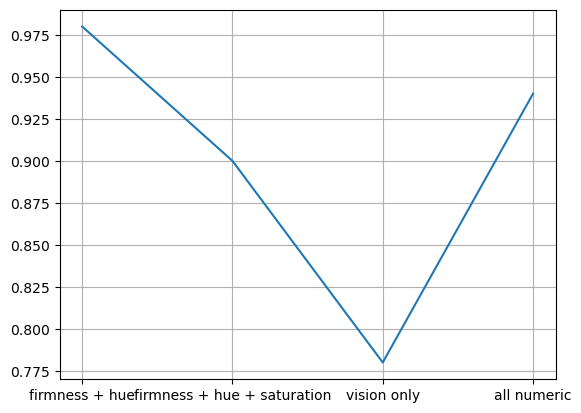

In [19]:
names = ['firmness + hue', 'firmness + hue + saturation', 'vision only', 'all numeric']
features = [
    ['firmness','hue'],['firmness','hue','saturation'],['hue','saturation','brightness'],['firmness','hue','saturation','brightness','sound_db','weight_g','size_cm3']
]


scores = []


for name, cols in zip(names, features):
    X = df[cols].copy()
    y = df['ripeness'].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)

    print(name, acc)
    scores.append(acc)

plt.plot(names, scores)
plt.grid()
plt.show()

**Observations**
So the highest accuracy 98% was from only the firmness and hue features, meaning that the texture and color tne are the most effective ways to predict a avacado's ripeness. Adding features like saturation or size did not improve the performance, and the vision only features made the accuracy much worse. Overall the model displays that firmness and hue are the most accurate indicators of avacado ripeness.

### Conclusion

The accuracy reached 98% in predicting avocado ripeness. Firmness and hue were the most important features and gave the best results. Color only performed worse, so the texture and color best represent the ripeness.